# Rithic Arputharaj U

# Task-05 Exploratory Data Analysis - Sports

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import warnings
warnings.simplefilter("ignore")

### Load dataset

In [4]:
data=pd.read_csv('matches.csv')

In [5]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Basic information and Preprocessing data

In [6]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
data.dropna(axis=1).head()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,venue
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,0,7,Maharashtra Cricket Association Stadium
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,10,Saurashtra Cricket Association Stadium
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6,Holkar Cricket Stadium
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,15,0,M Chinnaswamy Stadium


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


### How many Season playing cricket ?

In [10]:
data['season'].unique()


array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [11]:
len(data['season'].unique())

12

In [12]:
data['date']

0      2017-04-05
1      2017-04-06
2      2017-04-07
3      2017-04-08
4      2017-04-08
          ...    
751      05/05/19
752      07/05/19
753      08/05/19
754      10/05/19
755      12/05/19
Name: date, Length: 756, dtype: object

### Extract year and month from date columns

In [13]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month


In [14]:
data[['date','year','month']].tail()

,date,year,month
751,05/05/19,2019,5
752,07/05/19,2019,7
753,08/05/19,2019,8
754,10/05/19,2019,10
755,12/05/19,2019,12


### Which Year is conduct highest match?

In [15]:
df=data['year'].value_counts()
df.iplot(kind='bar',xTitle='year', yTitle='No of matches',title='Year wise match',barmode='stack', theme='solar',bargap=0.7,color='green')

### Month wise matches

In [16]:
df=data['month'].value_counts()
df.iplot(kind='bar',yTitle='Month', xTitle='No of matches',title='Month wise Match',barmode='stack',theme='solar', bargap=0.5,color='orange')

### Which team is highest participate in Team1?

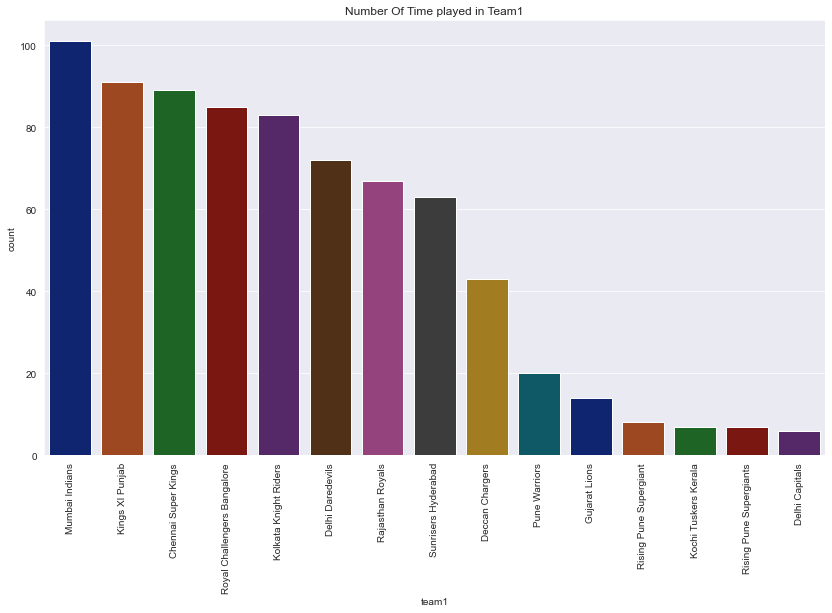

In [17]:
sns.countplot('team1',data=data,palette='dark',order=data['team1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('team1')
plt.title('Number Of Time played in Team1')
plt.show()

### Which team is mostly participate in Team2?

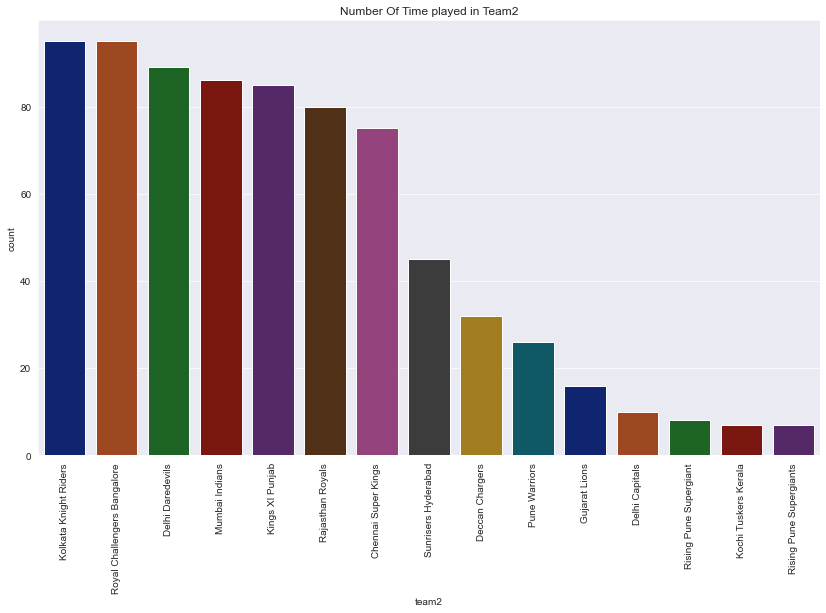

In [18]:
sns.countplot('team2',data=data,palette='dark',order=data['team2'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('team2')
plt.title('Number Of Time played in Team2')
plt.show()

### Which type of Result got Mostly in Team1 and Team2?

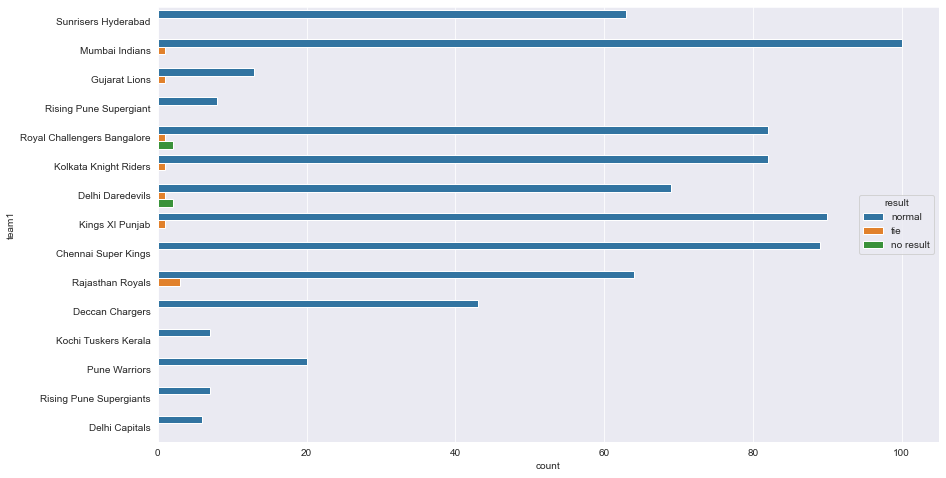

In [19]:
ax = sns.countplot(y="team1", hue="result", data=data)

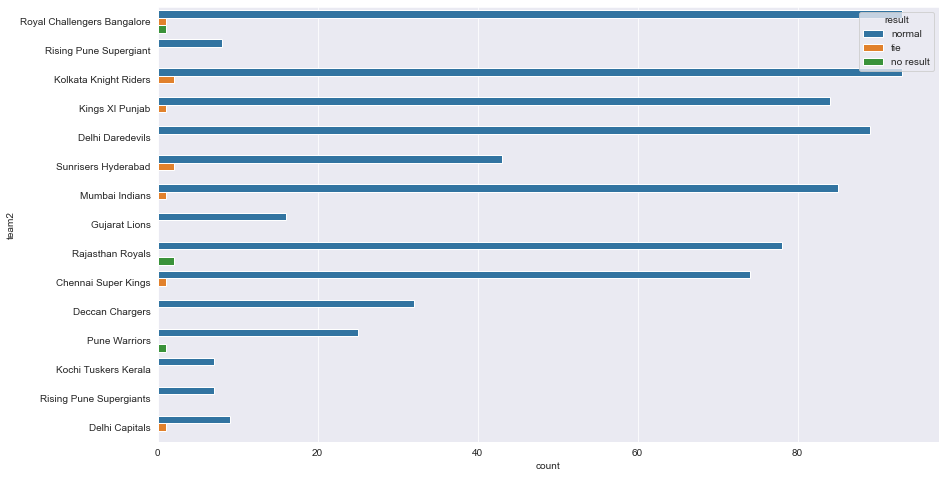

In [20]:
ax = sns.countplot(y="team2", hue="result", data=data)

### Which type of Result got Mostly in winner team

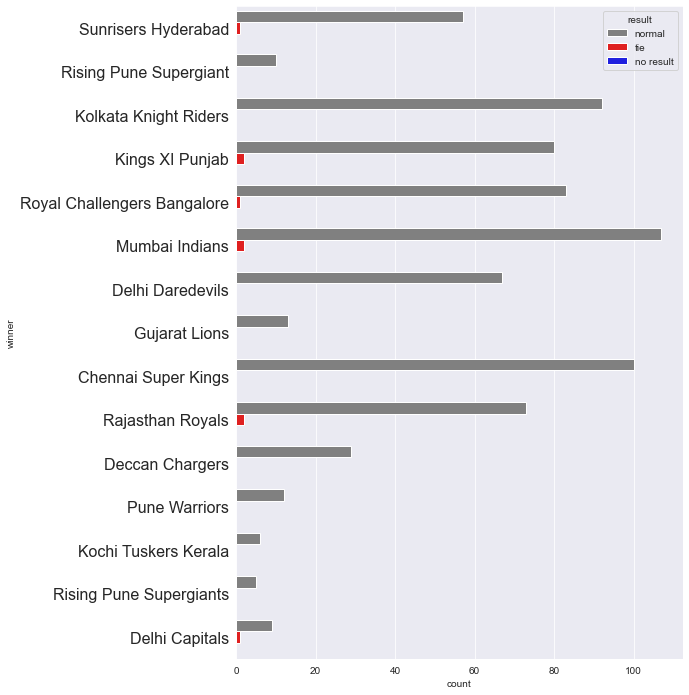

In [21]:

plt.figure(figsize=(8,12))
sn = sns.countplot(y='winner',data=data, hue='result', palette=['grey','red','blue'])

sn.set
sn = plt.yticks(rotation=0,fontsize=16)

### Percentage of Result

In [22]:
d_p=data['result'].value_counts()
d_p.iplot(kind='bar',yTitle='Percentage', xTitle='Types of result',theme='solar', bargap=0.7,color='white')

### Which team is most of the time win ?

In [23]:
teams_season = data.groupby('season')['winner'].value_counts()
teams_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [24]:
year = 2008
win_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_season_df = win_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [25]:
win_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


<AxesSubplot:xlabel='team', ylabel='wins'>

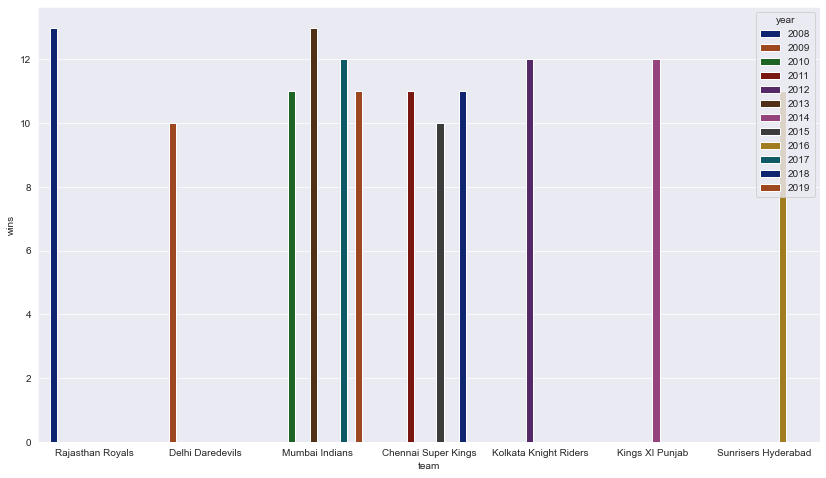

In [26]:
sns.barplot('team','wins',data=win_season_df,hue='year',palette='dark')

### Top Players

In [27]:
d=data['player_of_match'].value_counts()[:10]
d.iplot(kind='bar',xTitle='player', yTitle='No of matches',barmode='stack', theme='solar',bargap=0.7,color='blue'
       )

### Which  venue that hosted the maximum number of matches?

In [28]:
venue_mat=data['venue'].value_counts()

In [29]:
venue_data = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_mat.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_data = venue_data.append(temp_df, ignore_index=True)

<Figure size 576x864 with 0 Axes>

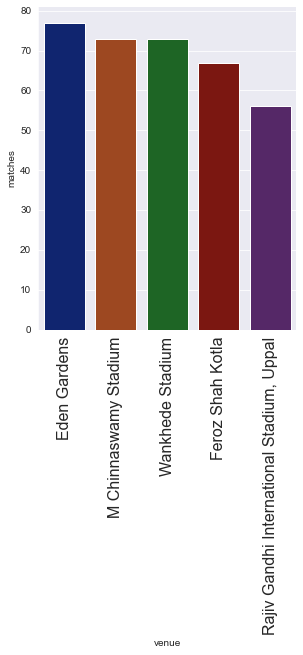

In [30]:

plt.figure(figsize=(8,12))
sn = sns.catplot(x='venue',y='matches',data=venue_data[:5], kind='bar',palette='dark')

sn.set
sn = plt.xticks(rotation=90,fontsize=16)

### Which city host match many time per season?


In [31]:
city_mat1=data['city'].value_counts()
city_mat1[:10].iplot(kind='area',theme='solar')

### The team that won the most number of toss

In [32]:
toss_ser = data['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)

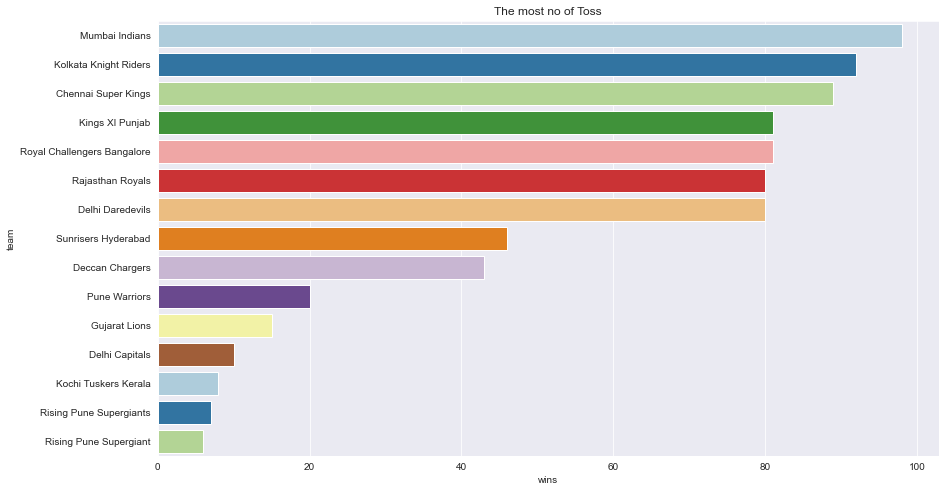

In [33]:
plt.title("The most no of Toss")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

### Which team is highest run and wickets?

In [34]:
data['win_by_runs'].idxmax()

43

In [35]:
data['win_by_runs'].max()

146

In [36]:
data.iloc[43]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
year                           2017
month                             5
Name: 43, dtype: object

In [37]:
data['win_by_wickets'].max()

10

In [38]:
data['win_by_wickets'].idxmax()

2

In [39]:
data.iloc[2]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

# Summarize:
<li>**12-IPL Season** till 2019 in 2013 76 days conduct matches 
<li>**In March and April ** month host most of the IPL match 
<li>**Mumbai ** city host Most of match
<li> **Eden Gardens Venue ** Mostly matches are hosted
<li>**Gric Gayle** is the most player of the match
<li>The best team and succesful IPL team is **Mumbai Indians **</div>